1. Download all the data in this <a href='https://drive.google.com/open?id=1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu'>rar_file</a> , it contains all the data required for the assignment.

2. When you unrar the file you'll get the files in the following format: `path/to/the/image.tif,category`.

3. The categories are numbered 0 to 15, in the following order:
    0. letter
    1. form
    2. email
    3. handwritten
    4. advertisement
    5. scientific report
    6. scientific publication
    7. specification
    8. file folder
    9. news article
    10. budget
    11. invoice
    12. presentation
    13. questionnaire
    14. resume
    15. memo

There is a file named as `labels_final.csv`, it consists of two columns.

- First column is path which is the required path to the images.
- Second is the class label.

Reference: https://stackoverflow.com/a/67177443/7579443

In [1]:
# !pip uninstall tensorflow
# !pip uninstall tensorflow-io
# !pip install tensorflow-gpu
# !pip install --no-deps tensorflow-io

In [2]:
import warnings
warnings.filterwarnings('ignore')

```
!wget --header="Host: doc-0k-6o-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8,hi;q=0.7" --header="Cookie: AUTH_a1tjusn0djulp0nobu33e17hoct57hqs_nonce=sld5jsvj2jiso" --header="Connection: keep-alive" "https://doc-0k-6o-docs.googleusercontent.com/docs/securesc/es7ufcf2kem27he1noii6k3ri998404q/3l4f5ifos3pd5lffe76f82lp3oitsoj7/1666454175000/00484516897554883881/00132744978255071993/1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu?e=download&ax=ALW9-sAt75L7EGqy1l_t6JFdqnP0y2p0jNvZ64BAd5tw-rxbWSXLoAEVAPicwXRWzbzd0OTtxjawh2dSqnd2x1PRK6Pwkfy6M_sapMx7VkleVdCnsdTtoDUGq8vYUCD19tAbmdJTndxYTv8WFtpgNf92rSZxuS3pXP3g6PT30D90AGsQ7r7CzKGwzDstjrcxA05utS21Qqk_K_FExug2x16opK2sIy4mJo4b9y03jn4NYdK7ukLBaaWb0jyA-FEJTNdko2tpycnCj7ISdiUOmNkV-bDWkb-RgEYhgNMqq6AMJX5RmRwrZdHLbYzwSsxvFOz_8bWWmTOHJ1wGcgF0PJ-v7lqkP1c90w5BtWokqBO5GonpCqkDRwTeDX9UlbIYlApY6jT69iopvshGsKi3J81dYvTxtgVTysxCxLzl8-_YjfkR61GcMEqAp0gpB0KBIuu2dhfh-T2_LfQ7yAFvyt1IflI5UDjIhyjXQHuhbDiBanfjEp7KvBfOfNBWR1_InjCPSy8LbBzMRCYRJwuVMroG40tJa09BJg4SiaAV2Vr4dN1amU1ugUrUuOuikRPrchYTET4y8VXlgByvKBeYGy_Vo_40e5m0ooRaHtPR3vUlMr9TYVTKhq4b8hSDJucXbTJw-lprv9cr2nBf6LvsXTFMqRawEGcd1oxSgVbM1uBHAY-ecLfQktL87S6vijH0rfTSf2u0E_nRDzCAVmjtkNRmt1BCnPXLAGUh4oxiiB0VKfZ9SlW5m4rIuT41hlaA_gQ3SHeGWD7yk4XoasetnAyWd0COL3czzK9F8MaQdJYf76MbPQFox_pOFsCM3h4MKEBED4A2R1zGmu10A6RfvQN5a7HAa1-mKKI4yh5q4OFAIQLpvNbMJwjesWMks2OJ_U8gldOxBbRyR5zDFcOP92g4QBOxhRkMo_wr6eeGhZn4IrwcSNY0odAocd6OrMG5A8gcfxq2dh6efQ&uuid=41c6af4e-52b5-4415-abb7-c0bf4eca16b3&authuser=0&nonce=sld5jsvj2jiso&user=00132744978255071993&hash=ra4conjcsaskskkqtv4nisjjm1q833hn" -c -O 'rvl-cdip.rar'
```

```
get_ipython().system_raw("unrar x /content/rvl-cdip.rar")
```

In [5]:
from IPython.display import display

In [6]:
from matplotlib import pyplot as plt
from matplotlib import style
style.use(style='seaborn-deep')

In [7]:
from tqdm import tqdm

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
import tensorflow as tf
import tensorflow_io as tfio

In [10]:
from tensorflow.keras.models import Model

In [11]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

In [12]:
from tensorflow.keras.applications.vgg16 import VGG16

In [13]:
from tensorflow.keras.callbacks import TensorBoard

In [14]:
import datetime
import os
import numpy as np
import pandas as pd
import pickle
import string

In [15]:
labels_path = '/content/labels_final.csv'
label_df = pd.read_csv(filepath_or_buffer=labels_path)

In [16]:
display(label_df.head())

,path,label
0,imagesv/v/o/h/voh71d00/509132755+-2755.tif,3
1,imagesl/l/x/t/lxt19d00/502213303.tif,3
2,imagesx/x/e/d/xed05a00/2075325674.tif,2
3,imageso/o/j/b/ojb60d00/517511301+-1301.tif,3
4,imagesq/q/z/k/qzk17e00/2031320195.tif,7


In [17]:
data_dir_path = '/content/data_final/'

In [18]:
data_df = pd.DataFrame()
data_df['path'] = data_dir_path + label_df['path'].values
data_df['label'] = label_df['label']

In [19]:
display(data_df.head())

,path,label
0,/content/data_final/imagesv/v/o/h/voh71d00/509...,3
1,/content/data_final/imagesl/l/x/t/lxt19d00/502...,3
2,/content/data_final/imagesx/x/e/d/xed05a00/207...,2
3,/content/data_final/imageso/o/j/b/ojb60d00/517...,3
4,/content/data_final/imagesq/q/z/k/qzk17e00/203...,7


In [20]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    48000 non-null  object
 1   label   48000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 750.1+ KB


In [21]:
sample_tiff = data_df['path'].values[-1]
print(sample_tiff)

/content/data_final/imagesr/r/o/l/rol45d00/2064701657.tif


In [22]:
image_tiff_string = tf.io.read_file(filename=sample_tiff)
# print(image_tiff_string)

In [23]:
image_matrix = tfio.experimental.image.decode_tiff(contents=image_tiff_string)
print(image_matrix.shape)
print(image_matrix[0])
image_matrix = image_matrix[:, :, :3]
print(image_matrix.shape)
print(image_matrix[0])
image_matrix = tf.image.resize(images=image_matrix, size=[256, 256])
print(image_matrix.shape)
# print(image_matrix[0])
image_matrix = tf.image.convert_image_dtype(image=image_matrix, dtype=tf.float32)

(1000, 754, 4)
tf.Tensor(
[[255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 ...
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]], shape=(754, 4), dtype=uint8)
(1000, 754, 3)
tf.Tensor(
[[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [255 255 255]
 [255 255 255]
 [255 255 255]], shape=(754, 3), dtype=uint8)
(256, 256, 3)


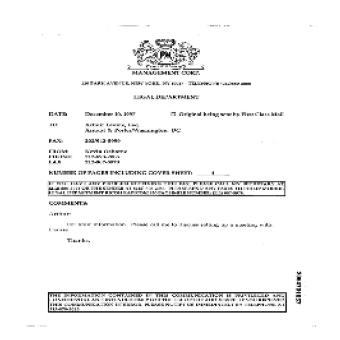

In [24]:
plt.figure(figsize=(12, 6))
plt.axis("off")
plt.imshow(np.array(image_matrix, np.int32))
plt.show()

Train, CV and Test data.

In [25]:
X = data_df['path'].values
y = data_df['label'].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train, random_state=0)

In [27]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(30720,) (30720,)
(7680,) (7680,)
(9600,) (9600,)


In [28]:
batch_size = 64
training_steps = X_train.shape[0] // batch_size
validation_steps = X_cv.shape[0] // batch_size

Data generator

In [29]:
h = 256
w = 256
d = 16

In [30]:
def make_tfdata_generator(images, labels, is_training=True, batch_size=batch_size, h=h, w=w, d=d):
    """
    Construct a data generator using tf.Dataset.
    """

    def parse_function(filename, label):
        # reading path 
        image_string = tf.io.read_file(filename=filename)
        # decoding image
        image = tfio.experimental.image.decode_tiff(contents=image_string)
        image = image[:, :, :3] # VGG model accepts 3 dim.
        image = tf.image.convert_image_dtype(image=image, dtype=tf.float32)
        # resize the image
        image = tf.image.resize(images=image, size=[h, w])
        # one hot coding for label
        y = tf.one_hot(indices=tf.cast(label, tf.uint8), depth=d)
        return image, y
    
    # creating a dataset from tensor slices
    dataset = tf.data.Dataset.from_tensor_slices(tensors=(images, labels))
    
    if is_training:
        dataset = dataset.shuffle(5000)  # depends on sample size

    # transform and batch data at the same time
    dataset = dataset.apply(
        transformation_func=tf.data.experimental.map_and_batch(
            map_func=parse_function,
            batch_size=batch_size,
            num_parallel_batches=4,
            drop_remainder=True if is_training else False
        )
    )
    
    # repeat the dataset indefinitely
    dataset = dataset.repeat()
    
    # prefetch the data into CPU/GPU
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

    return dataset

In [31]:
train_image_generator = make_tfdata_generator(images=X_train, labels=y_train)
valid_image_generator = make_tfdata_generator(images=X_cv, labels=y_cv)
test_image_generator = make_tfdata_generator(images=X_test, labels=y_test)

Instructions for updating:
Use `tf.data.Dataset.map(map_func, num_parallel_calls)` followed by `tf.data.Dataset.batch(batch_size, drop_remainder)`. Static tf.data optimizations will take care of using the fused implementation.


---

Model - 1

1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights. 
2. After VGG-16 network without FC layers, add a new Conv block ( 1 Conv layer and 1 Maxpooling ), 2 FC layers and an output layer to classify 16 classes. You are free to choose any hyperparameters/parameters of conv block, FC layers, output layer. 
3. Final architecture will be <b>INPUT --> VGG-16 without Top layers(FC) --> Conv Layer --> Maxpool Layer --> 2 FC layers --> Output Layer</b>
4.Print model.summary() and plot the architecture of the model. 
<a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>Reference for plotting model</a>
5. Train only new Conv block, FC layers, output layer. Don't train the VGG-16 network.

In [32]:
%load_ext tensorboard
# Clear any logs from previous runs
!rm -rf ./logs/

In [33]:
tf.keras.backend.clear_session()

In [34]:
input_layer_1 = Input(shape=(h, w, 3), name='Input')

VGG_model = VGG16(include_top=False, weights='imagenet', input_tensor=input_layer_1)
for layer in VGG_model.layers:
    layer.trainable = False

conv_1_1 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='Conv_1')(VGG_model.output)

pool_1_1 = MaxPool2D(pool_size=(2, 2), padding='valid', name='Pool_1')(conv_1_1)

flatten_1 = Flatten(name='Flatten')(pool_1_1)

dense_1_1 = Dense(units=60, name='Dense_1')(flatten_1)

dense_2_1 = Dense(units=50, name='Dense_2')(dense_1_1)

output_layer_1 = Dense(units=16, activation='softmax', name='Output')(dense_2_1)

58889256/58889256 [==============================] - 0s 0us/step


In [35]:
model_1 = Model(inputs=input_layer_1, outputs=output_layer_1, name='Model_1')
optimizer_1 = tf.keras.optimizers.Adam()
model_1.compile(optimizer=optimizer_1, loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
log_dir_1 = os.path.join('logs', 'fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback_1 = TensorBoard(log_dir=log_dir_1, histogram_freq=1)

callbacks_1 = [tensorboard_callback_1]

In [38]:
model_1.fit(x=train_image_generator,
            steps_per_epoch=training_steps,
            validation_data=valid_image_generator,
            validation_steps=validation_steps,
            epochs=5,
            callbacks=callbacks_1)

Epoch 1/5
480/480 [==============================] - 201s 417ms/step - loss: 1.0694 - accuracy: 0.6748 - val_loss: 0.9874 - val_accuracy: 0.6984
Epoch 2/5
480/480 [==============================] - 220s 458ms/step - loss: 0.8774 - accuracy: 0.7358 - val_loss: 0.9500 - val_accuracy: 0.7189
Epoch 3/5
480/480 [==============================] - 223s 464ms/step - loss: 0.7570 - accuracy: 0.7711 - val_loss: 0.9936 - val_accuracy: 0.7090
Epoch 4/5
480/480 [==============================] - 212s 442ms/step - loss: 0.6754 - accuracy: 0.7953 - val_loss: 0.9247 - val_accuracy: 0.7318
Epoch 5/5
480/480 [==============================] - 224s 467ms/step - loss: 0.6001 - accuracy: 0.8149 - val_loss: 0.9511 - val_accuracy: 0.7324


In [39]:
model_1.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

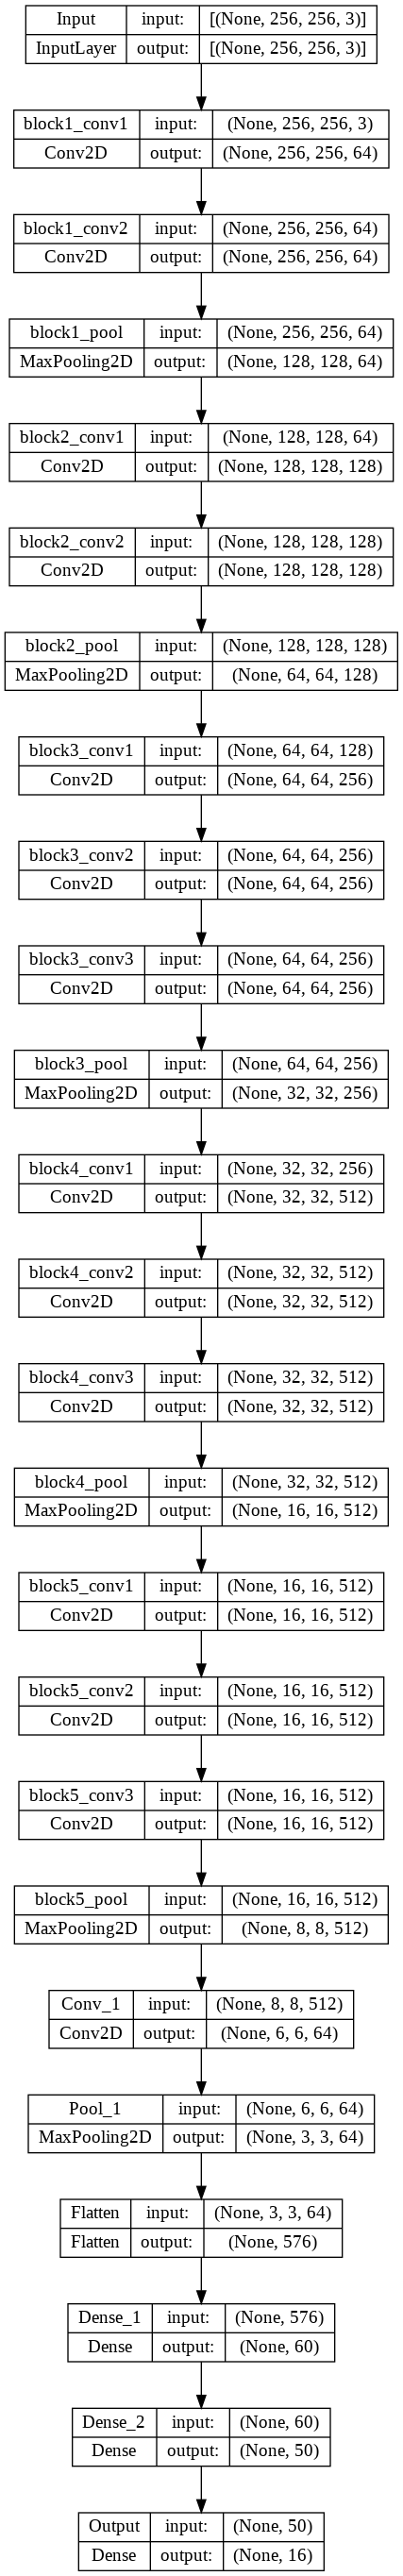

In [40]:
tf.keras.utils.plot_model(model=model_1,
                          to_file='model_1.png',
                          show_shapes=True,
                          show_layer_names=True,
                          expand_nested=False)

In [42]:
# %tensorboard --logdir logs/fits

![](https://user-images.githubusercontent.com/63338657/197350468-0e2d8eb3-4c15-4fdb-8fa8-fac2b5564f46.png)

![](https://user-images.githubusercontent.com/63338657/197350536-1238b116-a1f6-4bd1-bdb3-796f7a48c5dd.png)

Conclusion - 1

1. At the last epoch, the model gained highest validation accuracy.
2. All the layers of VGG16 model's `trainable` attribute are set to `False`.
3. If we had run for more epochs, the model would have performed well.

---

Model - 2

1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights.
2. After VGG-16 network without FC layers, don't use FC layers, use conv layers only as Fully connected layer. Any FC layer can be converted to a CONV layer. This conversion will reduce the No of Trainable parameters in FC layers. For example, an FC layer with K=4096 that is looking at some input volume of size 7×7×512 can be equivalently expressed as a CONV layer with F=7,P=0,S=1,K=4096. 
In other words, we are setting the filter size to be exactly the size of the input volume, and hence the output will simply be 1×1×4096 since only a single depth column “fits” across the input volume, giving identical result as the 
initial FC layer. You can refer <a href='http://cs231n.github.io/convolutional-networks/#convert'>this</a> link to better understanding of using Conv layer in place of fully connected layers.
3. Final architecture will be VGG-16 without FC layers (without top), 2 Conv layers identical to FC layers, 1 output layer for 16 class classification. <b>INPUT --> VGG-16 without Top layers (FC) --> 2 Conv Layers identical to FC --> Output Layer</b>.
4. 4.Print model.summary() and plot the architecture of the model. 
<a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>Reference for plotting model</a>.
5. Train only last 2 Conv layers identical to FC layers, 1 output layer. Don't train the VGG-16 network.

In [43]:
%load_ext tensorboard
# Clear any logs from previous runs
!rm -rf ./logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [44]:
tf.keras.backend.clear_session()

In [45]:
input_layer_2 = Input(shape=(h, w, 3), name='Input')

VGG_model = VGG16(include_top=False, weights='imagenet', input_tensor=input_layer_2)
for layer in VGG_model.layers:
    layer.trainable = False

conv_1_2 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='Conv_1')(VGG_model.output)

conv_2_2 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='Conv_2')(conv_1_2)

flatten_2 = Flatten(name='Flatten')(conv_2_2)

output_layer_2 = Dense(units=16, activation='softmax', name='Output')(flatten_2)

In [46]:
model_2 = Model(inputs=input_layer_2, outputs=output_layer_2, name='Model_2')
optimizer_2 = tf.keras.optimizers.Adam()
model_2.compile(optimizer=optimizer_2, loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
log_dir_2 = os.path.join('logs', 'fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback_2 = TensorBoard(log_dir=log_dir_2, histogram_freq=1)

callbacks_2 = [tensorboard_callback_2]

In [48]:
model_2.fit(x=train_image_generator,
            steps_per_epoch=training_steps,
            validation_data=valid_image_generator,
            validation_steps=validation_steps,
            epochs=5,
            callbacks=callbacks_2)

Epoch 1/5
480/480 [==============================] - 219s 454ms/step - loss: 1.4092 - accuracy: 0.5723 - val_loss: 1.2309 - val_accuracy: 0.6313
Epoch 2/5
480/480 [==============================] - 227s 474ms/step - loss: 1.0273 - accuracy: 0.6882 - val_loss: 1.0362 - val_accuracy: 0.6904
Epoch 3/5
480/480 [==============================] - 270s 563ms/step - loss: 0.8753 - accuracy: 0.7350 - val_loss: 0.9446 - val_accuracy: 0.7182
Epoch 4/5
480/480 [==============================] - 229s 478ms/step - loss: 0.7621 - accuracy: 0.7676 - val_loss: 0.9371 - val_accuracy: 0.7332
Epoch 5/5
480/480 [==============================] - 232s 484ms/step - loss: 0.6817 - accuracy: 0.7896 - val_loss: 0.9790 - val_accuracy: 0.7188


In [49]:
model_2.summary()

Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

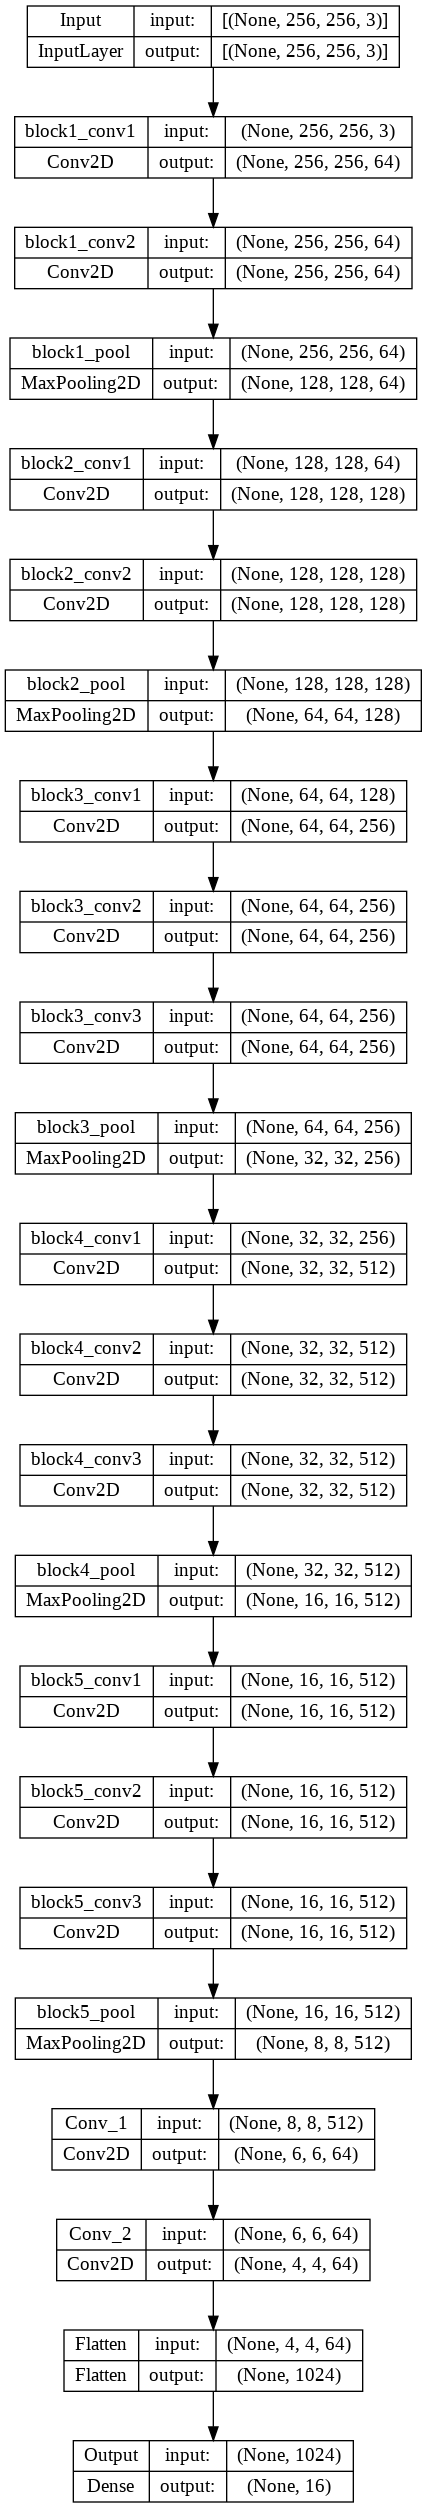

In [50]:
tf.keras.utils.plot_model(model=model_2,
                          to_file='model_2.png',
                          show_shapes=True,
                          show_layer_names=True,
                          expand_nested=False)

In [52]:
# %tensorboard --logdir logs/fits

![](https://user-images.githubusercontent.com/63338657/197352446-3c47d5ee-4a06-4cf9-90bb-11b0233a6b86.png)

![](https://user-images.githubusercontent.com/63338657/197352496-e040fa09-8aa9-43d3-832f-2048f5a5a8cf.png)

Conclusion - 2

1. At the 4th epoch, the model gained highest validation accuracy.
2. All the layers of VGG16 model's `trainable` attribute are set to `False`.
3. If we had run for more epochs, the model would have performed well.
4. We did not use any `Dense` layers.

---

Model - 3

Use same network as Model-2 '<b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC --> Output Layer</b>' and train only last 6 Layers of VGG-16 network, 2 Conv layers identical to FC layers, 1 output layer.

In [53]:
%load_ext tensorboard
# Clear any logs from previous runs
!rm -rf ./logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [54]:
tf.keras.backend.clear_session()

In [55]:
input_layer_3 = Input(shape=(h, w, 3), name='Input')

VGG_model = VGG16(include_top=False, weights='imagenet', input_tensor=input_layer_3)
# last 6 layers' trainable attribute is True.
for layer in VGG_model.layers[:-6]:
    layer.trainable = False

conv_1_3 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='Conv_1')(VGG_model.output)

conv_2_3 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='Conv_2')(conv_1_3)

flatten_3 = Flatten(name='Flatten')(conv_2_3)

output_layer_3 = Dense(units=16, activation='softmax', name='Output')(flatten_3)

In [56]:
model_3 = Model(inputs=input_layer_3, outputs=output_layer_3, name='Model_3')
optimizer_3 = tf.keras.optimizers.Adam()
model_3.compile(optimizer=optimizer_3, loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
log_dir_3 = os.path.join('logs', 'fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback_3 = TensorBoard(log_dir=log_dir_3, histogram_freq=1)

callbacks_3 = [tensorboard_callback_3]

In [58]:
model_3.fit(x=train_image_generator,
            steps_per_epoch=training_steps,
            validation_data=valid_image_generator,
            validation_steps=validation_steps,
            epochs=5,
            callbacks=callbacks_3)

Epoch 1/5
480/480 [==============================] - 238s 491ms/step - loss: 2.7791 - accuracy: 0.0605 - val_loss: 2.7726 - val_accuracy: 0.0624
Epoch 2/5
480/480 [==============================] - 238s 495ms/step - loss: 2.7728 - accuracy: 0.0583 - val_loss: 2.7726 - val_accuracy: 0.0624
Epoch 3/5
480/480 [==============================] - 236s 493ms/step - loss: 2.7728 - accuracy: 0.0601 - val_loss: 2.7726 - val_accuracy: 0.0625
Epoch 4/5
480/480 [==============================] - 236s 493ms/step - loss: 2.7728 - accuracy: 0.0604 - val_loss: 2.7726 - val_accuracy: 0.0624
Epoch 5/5
480/480 [==============================] - 238s 495ms/step - loss: 2.7728 - accuracy: 0.0594 - val_loss: 2.7726 - val_accuracy: 0.0624


In [62]:
model_3.summary()

Model: "Model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

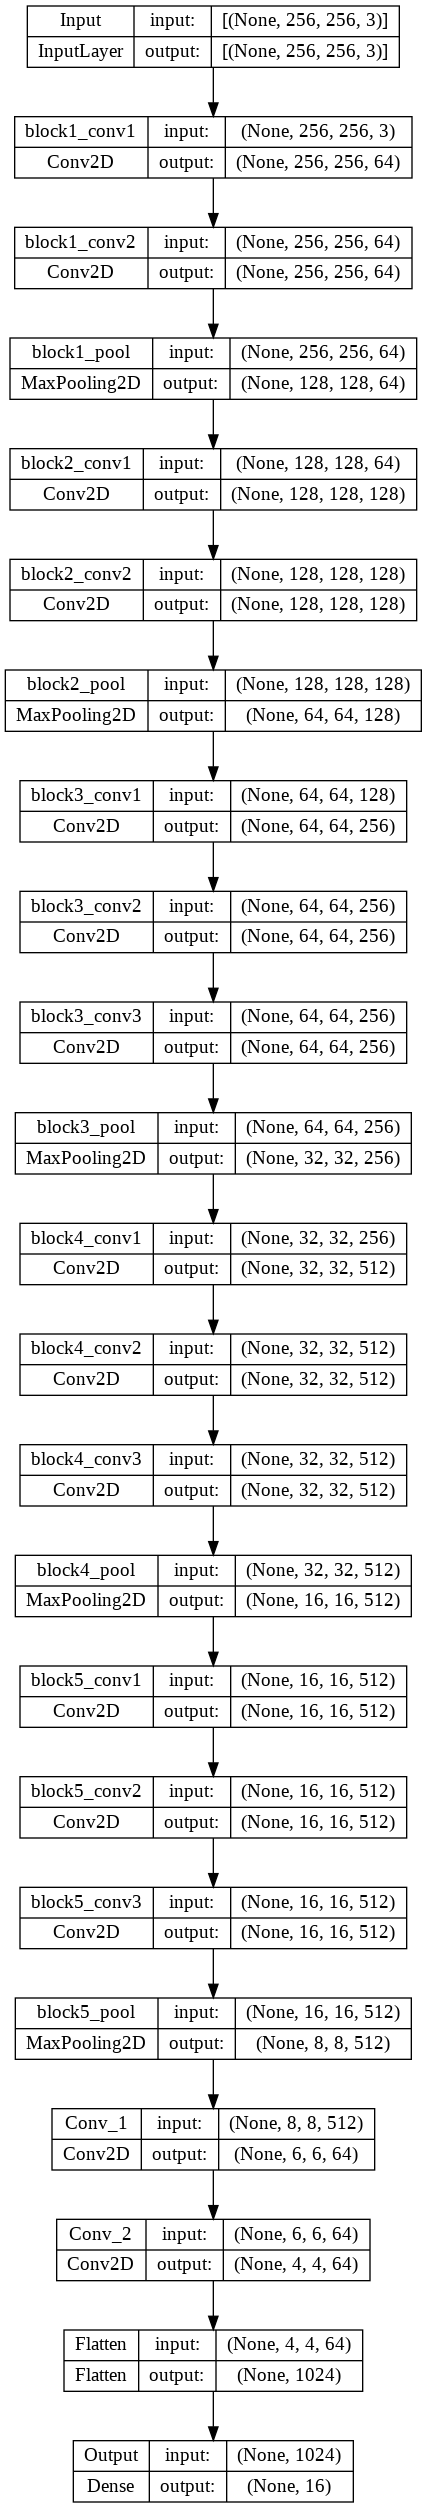

In [63]:
tf.keras.utils.plot_model(model=model_3,
                          to_file='model_3.png',
                          show_shapes=True,
                          show_layer_names=True,
                          expand_nested=False)

In [64]:
# %tensorboard --logdir logs/fits

![](https://user-images.githubusercontent.com/63338657/197353911-2e7cd3ce-b8de-4a43-9605-daf326d528e6.png)

![](https://user-images.githubusercontent.com/63338657/197353975-9fbc224f-c8de-4063-921e-52b55a70b2da.png)

Conclusion - 3

1. We trained the last 6 layers of VGG16 model.
2. This is a poor model.

---

Evaluation of the models.

In [65]:
testing_steps = X_test.shape[0] // batch_size

In [66]:
result_1 = model_1.evaluate(x=test_image_generator, steps=testing_steps, batch_size=batch_size)
print("Test Loss: {} and Test Accuracy: {}".format(result_1[0], result_1[1]))

150/150 [==============================] - 61s 407ms/step - loss: 0.9517 - accuracy: 0.7278
Test Loss: 0.9517355561256409 and Test Accuracy: 0.7278125286102295


In [67]:
result_2 = model_2.evaluate(x=test_image_generator, steps=testing_steps, batch_size=batch_size)
print("Test Loss: {} and Test Accuracy: {}".format(result_2[0], result_2[1]))

150/150 [==============================] - 54s 355ms/step - loss: 0.9804 - accuracy: 0.7251
Test Loss: 0.9803532958030701 and Test Accuracy: 0.7251041531562805


In [68]:
result_3 = model_3.evaluate(x=test_image_generator, steps=testing_steps, batch_size=batch_size)
print("Test Loss: {} and Test Accuracy: {}".format(result_3[0], result_3[1]))

150/150 [==============================] - 59s 391ms/step - loss: 2.7726 - accuracy: 0.0624
Test Loss: 2.7726123332977295 and Test Accuracy: 0.06239583343267441


---

End of the file.